In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Feature Engineering

In [8]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [10]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [12]:
df = df.rename(columns = {'yes':'Smoker'})

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [14]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Exploratory Analysis

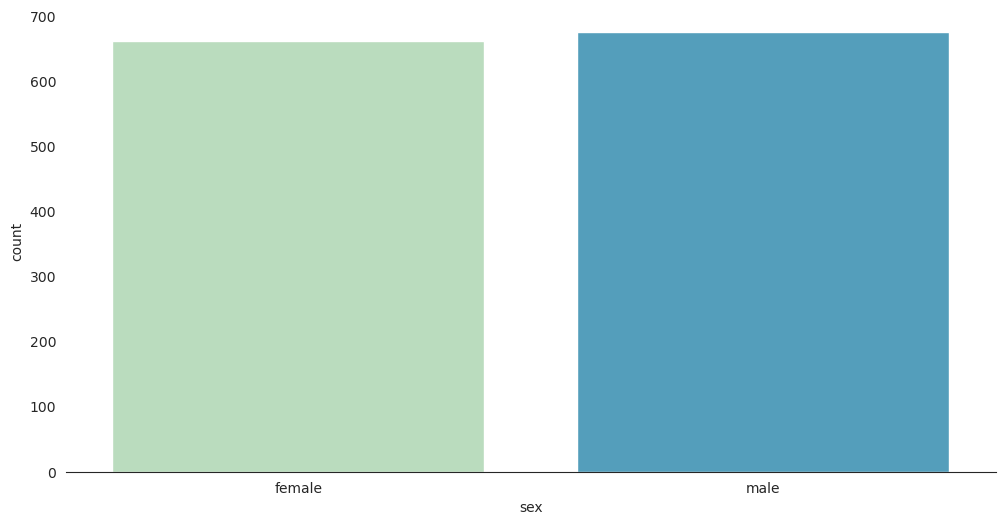

In [15]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

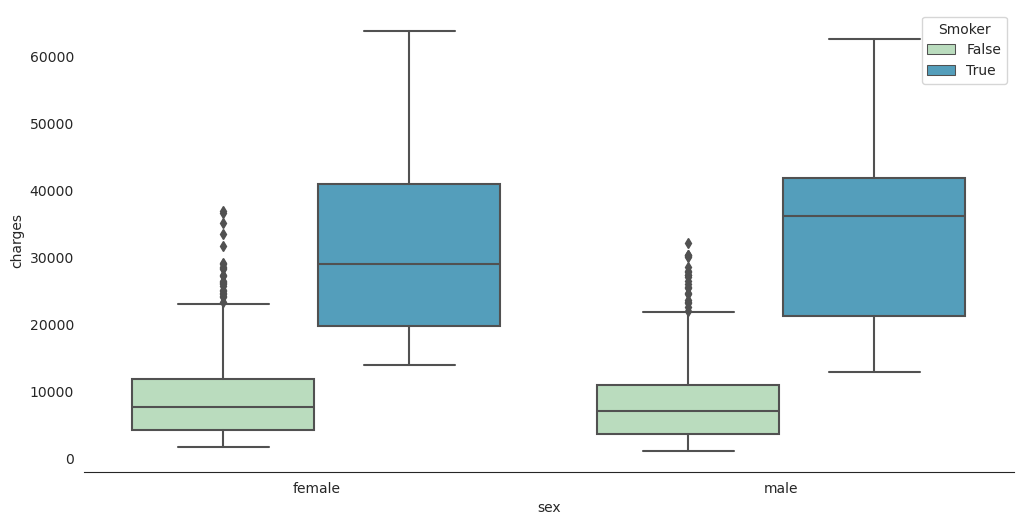

In [16]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

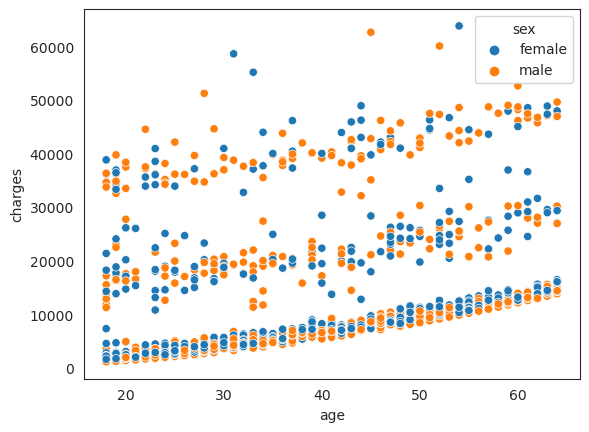

In [17]:

sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<Axes: xlabel='age', ylabel='charges'>

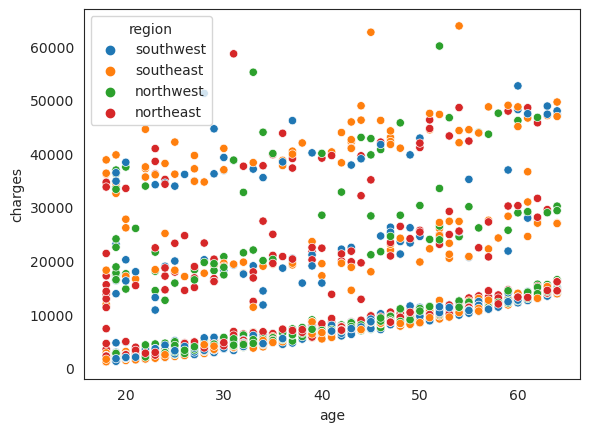

In [18]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

<Axes: xlabel='age', ylabel='charges'>

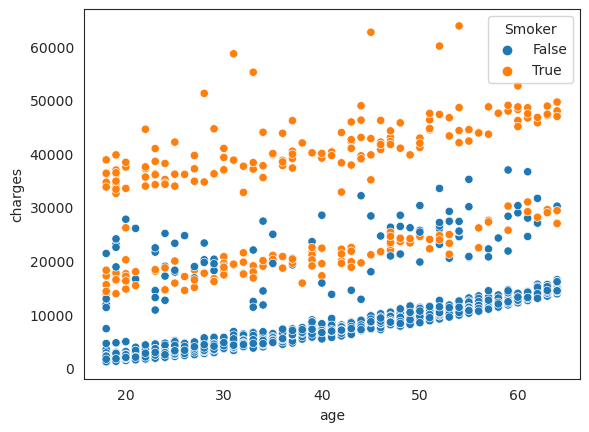

In [19]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

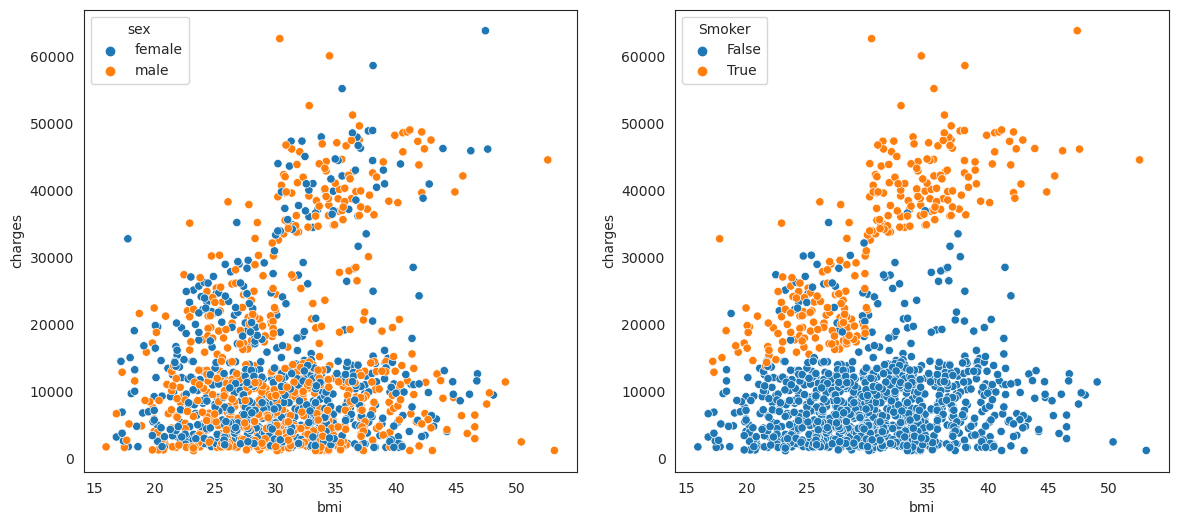

In [20]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

<Axes: xlabel='bmi', ylabel='charges'>

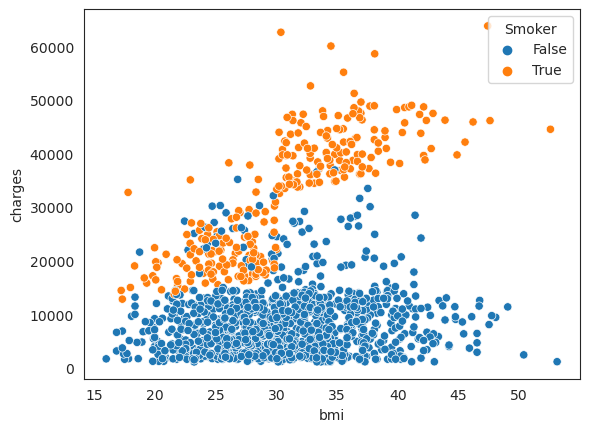

In [21]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker')

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [23]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

<Axes: >

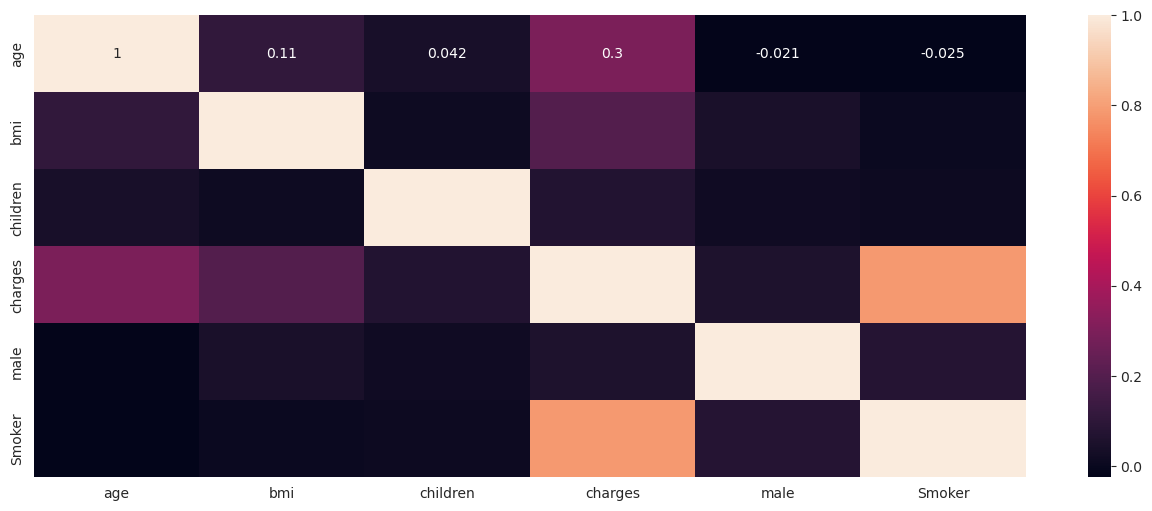

In [24]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

# Splitting the data

In [25]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [27]:
x_train.shape

(802, 5)

In [28]:
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [31]:
scaled_x_train

array([[ 0.90946218,  0.12853594, -0.88940743, -0.96808991, -0.50894665],
       [-0.50066574,  1.15253876,  1.65810957, -0.96808991, -0.50894665],
       [ 0.62743659, -0.5492523 , -0.0402351 , -0.96808991, -0.50894665],
       ...,
       [ 1.61452613, -0.50016218, -0.0402351 ,  1.03296191, -0.50894665],
       [-0.14813376,  0.62891074, -0.0402351 , -0.96808991, -0.50894665],
       [-0.57117214, -0.32016505, -0.0402351 ,  1.03296191, -0.50894665]])

# Support vector regression

In [32]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [33]:
predict

array([9447.70611933, 9492.10368469, 9398.6734536 , 9507.59157646,
       9406.88588745, 9441.32281484, 9414.33381888, 9495.93548186,
       9375.45164058, 9408.40868816, 9502.82210584, 9375.97647819,
       9502.60407288, 9467.05076569, 9492.67635835, 9450.75965999,
       9392.35172282, 9414.55247807, 9509.42758063, 9389.92408821,
       9433.98445028, 9477.81169209, 9421.90098887, 9500.56602571,
       9479.90077236, 9476.6299897 , 9493.57751168, 9537.0453928 ,
       9467.74278599, 9495.59242602, 9409.30216801, 9470.13954051,
       9403.07084005, 9446.73750211, 9400.13585613, 9418.23640783,
       9368.45378344, 9465.45388849, 9398.52571693, 9433.00799714,
       9507.81345637, 9434.37235823, 9390.56066343, 9449.30826356,
       9439.54832772, 9410.20619501, 9519.06883588, 9423.16733741,
       9487.94780146, 9379.9311783 , 9502.58460756, 9523.96013963,
       9483.81100047, 9369.65368203, 9497.12997848, 9368.61670187,
       9390.08501121, 9493.13503813, 9395.25387224, 9379.31115

In [34]:
y_test

805      7731.85785
908     15170.06900
478      1534.30450
951     47462.89400
732      4234.92700
           ...     
1040    20234.85475
758      5428.72770
585      4779.60230
802      2103.08000
567      7256.72310
Name: charges, Length: 536, dtype: float64

In [35]:
np.mean((y_test - predict)**2)

158682349.1722296

In [36]:

sns.set_style('dark')
f = sns.scatterplot(predict,y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given